In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

 # *Data Exploration*

In [2]:
# Load the Dataset
mobile_data = pd.read_csv('Mobile Data.csv')

In [3]:
mobile_data.head()


,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
mobile_data.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


In [5]:
# Shape of Dataset
mobile_data.shape

(541, 12)

In [6]:
# Dimention of Dataset
mobile_data.ndim

2

In [7]:
# Information of Dataset
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [8]:
# Summary of Numerical columns in Dataset
mobile_data.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


In [9]:
# Columns in Dataset
mobile_data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [10]:
# Drop unnecessary columns
mobile_data.drop('Unnamed: 0',axis = 1, inplace=True)

In [11]:
mobile_data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


# *Data Preprocessing* :

In [12]:
# Rename the column Names
mobile_data.rename(columns={'Battery_':'mAh of Battery','Rear Camera':'Rear Camera(MP)','Front Camera':'Front Camera(MP)','Processor_':'Processor','Prize':'Price of Phone'},inplace=True)

In [13]:
#New columns in datset
mobile_data.columns


Index(['Model', 'Colour', 'Memory', 'RAM', 'mAh of Battery', 'Rear Camera(MP)',
       'Front Camera(MP)', 'AI Lens', 'Mobile Height', 'Processor',
       'Price of Phone'],
      dtype='object')

In [14]:
# Extract MP from Both the columns of camera as it will create problem in model training
# Make function to extract integer from mixed value
import re
def int_extracter(x):
    return re.search('\d+',x).group()

In [15]:
mobile_data['Rear Camera(MP)'] = mobile_data['Rear Camera(MP)'].apply(lambda x:int_extracter(x))

In [16]:
mobile_data['Front Camera(MP)'] = mobile_data['Front Camera(MP)'].apply(lambda x:int_extracter(x))

In [17]:
mobile_data.sample(5)


,Model,Colour,Memory,RAM,mAh of Battery,Rear Camera(MP),Front Camera(MP),AI Lens,Mobile Height,Processor,Price of Phone
456,vivo Y1s,Aurora Blue,32,3,4030,13,5,0,15.80,MediaTek Helio P35,"9,387"
189,realme C33 2023,Sandy Gold,64,4,5000,50,5,0,16.51,Unisoc T612,"9,999"
449,vivo Y16,Drizzling Gold,32,3,5000,13,5,0,16.54,Mediatek Helio P35,"10,989"
74,POCO M4 Pro,Yellow,128,8,5000,64,16,0,16.33,Mediatek Helio G96,"13,999"
300,vivo Y35,Dawn Gold,128,8,5000,50,16,0,16.71,Qualcomm Snapdragon 680,"16,999"


In [18]:
# Remove comma from prices
mobile_data['Price of Phone'] = mobile_data['Price of Phone'].str.replace(',', '').astype(float)


In [19]:
mobile_data['Rear Camera(MP)'] = mobile_data['Rear Camera(MP)'].astype(int)
mobile_data['Front Camera(MP)'] = mobile_data['Front Camera(MP)'].astype(int)

In [20]:
# Describe the data
mobile_data.describe()

,Memory,RAM,mAh of Battery,Rear Camera(MP),Front Camera(MP),AI Lens,Mobile Height,Price of Phone
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,46.110906,11.992606,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,31.260416,9.053746,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.000000


In [21]:
# Checking Null values
mobile_data.isnull().sum()

Model               0
Colour              0
Memory              0
RAM                 0
mAh of Battery      0
Rear Camera(MP)     0
Front Camera(MP)    0
AI Lens             0
Mobile Height       0
Processor           0
Price of Phone      0
dtype: int64

In [22]:
# Check data types information
mobile_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             541 non-null    object 
 1   Colour            541 non-null    object 
 2   Memory            541 non-null    int64  
 3   RAM               541 non-null    int64  
 4   mAh of Battery    541 non-null    int64  
 5   Rear Camera(MP)   541 non-null    int64  
 6   Front Camera(MP)  541 non-null    int64  
 7   AI Lens           541 non-null    int64  
 8   Mobile Height     541 non-null    float64
 9   Processor         541 non-null    object 
 10  Price of Phone    541 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 46.6+ KB


<Axes: ylabel='Price of Phone'>

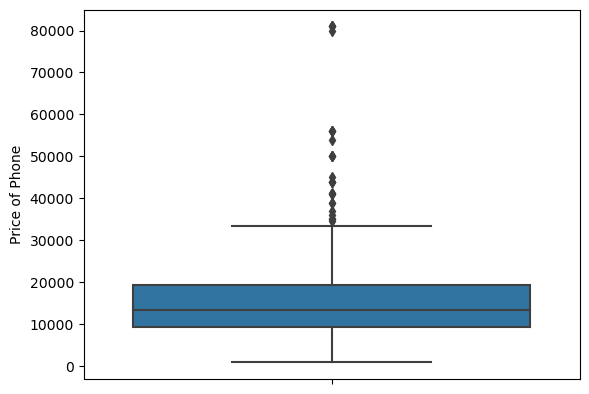

In [23]:
# Checking outliers
sns.boxplot(data = mobile_data,y = 'Price of Phone')


<Axes: ylabel='Mobile Height'>

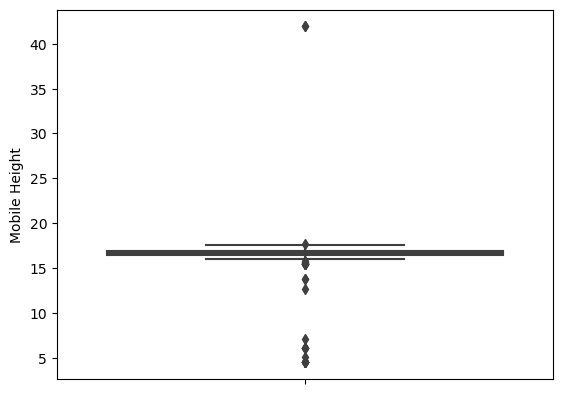

In [24]:
sns.boxplot(data = mobile_data,y = 'Mobile Height')


In [25]:
# Handle outliers in column with IQR method
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [26]:

# Make variables for lower and upper limit
lower_limit_iqr,upper_limit_iqr = iqr_technique(mobile_data['Price of Phone'])


In [27]:
# Cap the outliers
mobile_data['Price of Phone'] = np.where(mobile_data['Price of Phone']>upper_limit_iqr,upper_limit_iqr,np.where(mobile_data['Price of Phone']<lower_limit_iqr,lower_limit_iqr,mobile_data['Price of Phone']))

<Axes: ylabel='Price of Phone'>

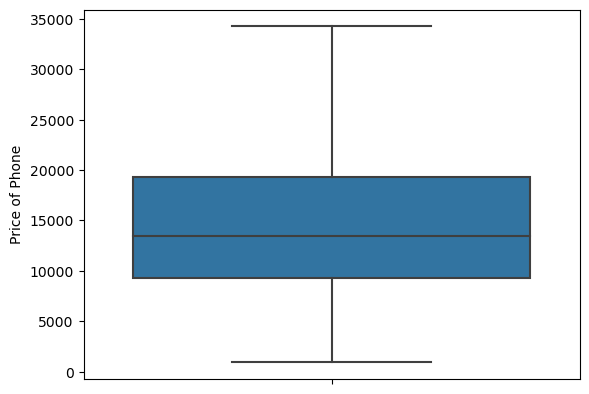

In [28]:
# Box plot of price after handling outliers
sns.boxplot(data = mobile_data,y = 'Price of Phone')


In [29]:
# Check duplicate Values in Dataset and remove them
print("\nDuplicate Rows:")
print(mobile_data[mobile_data.duplicated()])


Duplicate Rows:
                     Model          Colour  Memory  RAM  mAh of Battery  \
27             vivo T2x 5G     Marine Blue     128    6            5000   
48            MOTOROLA e32     Arctic Blue      64    4            5000   
91   SAMSUNG Galaxy F14 5G   B.A.E. Purple     128    4            6000   
132  SAMSUNG Galaxy F14 5G       OMG Black     128    6            6000   
247              redmi min             M3)      16    4            1000   
344         Tecno Spark 9T  Turquoise Cyan      64    4            5000   
352         POCO X4 Pro 5G     Laser Black     128    8            5000   
424            realme C30s    Stripe Black      64    4            5000   
437           vivo Y100 5G    Pacific Blue     128    8            4500   
480               POCO C31      Royal Blue      64    4            5000   

     Rear Camera(MP)  Front Camera(MP)  AI Lens  Mobile Height  \
27                50                 8        0          16.71   
48                50     

In [30]:
# Drop Duplicates
mobile_data.drop_duplicates(inplace=True)

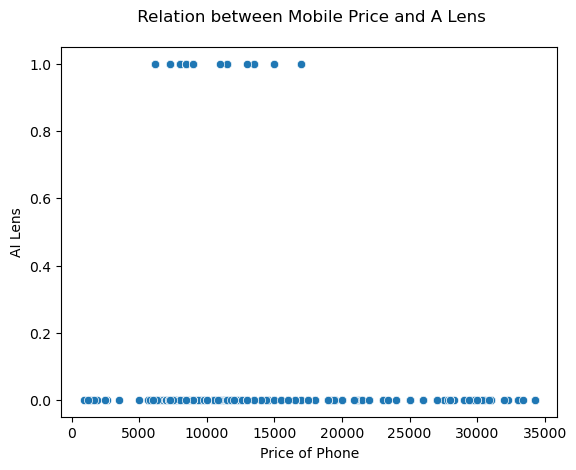

In [31]:
# Relation between Phone price and AI Lens
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y= 'AI Lens')
plt.title(' Relation between Mobile Price and A Lens\n')
plt.show()

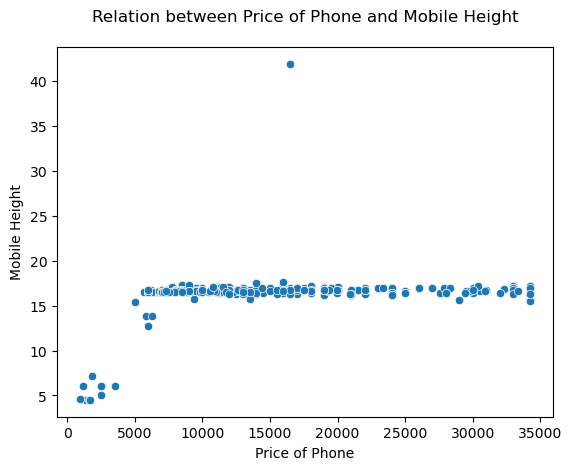

In [32]:
# Relation between Phone price and Mobile Height
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y= 'Mobile Height')
plt.title('Relation between Price of Phone and Mobile Height\n')
plt.show()

# *Feature Extraction* :

In [33]:
# Removeing AI Lens and Mobile hight columns as these features are not affecting the price of Mobile
mobile_data.drop(['AI Lens','Mobile Height'],axis = 1, inplace=True)

In [34]:
#Head of encoded Data
mobile_data.head()


,Model,Colour,Memory,RAM,mAh of Battery,Rear Camera(MP),Front Camera(MP),Processor,Price of Phone
0,Infinix SMART 7,Night Black,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32,2,5000,8,5,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,G37,8999.0


# *Feature Creation* :

In [35]:
# Make a feature for Camera Quality index by adding both the camera's
def concat_colums(x,y):
    if x>0 and y>0:
        return str(x) + '+' + str(y)
    elif x==0 and y>0 :
        return str(y)
    elif x>0 and y == 0:
        return str(x)
    else:
        return str(0)
concat_colums(0,0)

'0'

In [36]:
# Apply function in dataset to add new feature
mobile_data['Camera quality index (Front + Rear specs in MP)'] = mobile_data.apply(lambda x: concat_colums(x['Front Camera(MP)'],x['Rear Camera(MP)']),axis = 1)

In [37]:
# Make a feature for Phone Storage by adding both memory columns
mobile_data['Phone storage(RAM +ROM in GB)'] = mobile_data.apply(lambda x: concat_colums(x['RAM'],x['Memory']),axis = 1)

In [38]:
# Values counts of Phone storage
mobile_data['Phone storage(RAM +ROM in GB)'].value_counts()

Phone storage(RAM +ROM in GB)
4+64     128
8+128    112
6+128    100
4+128     41
8+256     40
3+32      29
2+32      22
6+64      15
2+64      11
3+64       9
4+256      8
6+256      4
2+16       2
8+64       2
4+16       2
2+256      2
3+256      1
4+32       1
8+16       1
3+128      1
Name: count, dtype: int64

In [39]:
# Values counts of Camara Quality index
mobile_data['Camera quality index (Front + Rear specs in MP)'].value_counts()

Camera quality index (Front + Rear specs in MP)
8+50      91
16+50     82
5+8       50
5+13      45
5+50      38
16+64     35
16+108    25
13+50     25
13+48     18
8+13      17
32+50     12
8+64      11
16+48     10
0          9
2          6
16+200     6
12+12      5
32+64      5
13+64      4
50+64      4
2+5        3
50+50      3
32+108     3
8+48       2
16+32      2
60+108     2
60+200     2
44+50      2
16+40      2
8+12       2
8+108      1
8+16       1
8+8        1
10+50      1
32+48      1
32+12      1
20+12      1
20+64      1
10+12      1
12+50      1
Name: count, dtype: int64

In [40]:
# Head of Data now after feature engineering
mobile_data.head()


,Model,Colour,Memory,RAM,mAh of Battery,Rear Camera(MP),Front Camera(MP),Processor,Price of Phone,Camera quality index (Front + Rear specs in MP),Phone storage(RAM +ROM in GB)
0,Infinix SMART 7,Night Black,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0,5+13,4+64
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0,5+13,4+64
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,Qualcomm Snapdragon 680,11999.0,16+50,8+128
3,POCO C50,Royal Blue,32,2,5000,8,5,Mediatek Helio A22,5649.0,5+8,2+32
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,G37,8999.0,5+50,8+128


In [41]:
mobile_data.to_csv('Final_Mobile_Data.csv')

In [42]:
# Correlation of standard Mobile data
correlation_matrix = mobile_data.corr(numeric_only=True)

In [43]:
correlation_matrix

,Memory,RAM,mAh of Battery,Rear Camera(MP),Front Camera(MP),Price of Phone
Memory,1.000000,0.624728,-0.070355,0.527890,0.493396,0.674231
RAM,0.624728,1.000000,-0.112560,0.437132,0.491954,0.649396
mAh of Battery,-0.070355,-0.112560,1.000000,0.191132,0.021995,0.017919
Rear Camera(MP),0.527890,0.437132,0.191132,1.000000,0.502209,0.535294
Front Camera(MP),0.493396,0.491954,0.021995,0.502209,1.000000,0.649018
Price of Phone,0.674231,0.649396,0.017919,0.535294,0.649018,1.000000


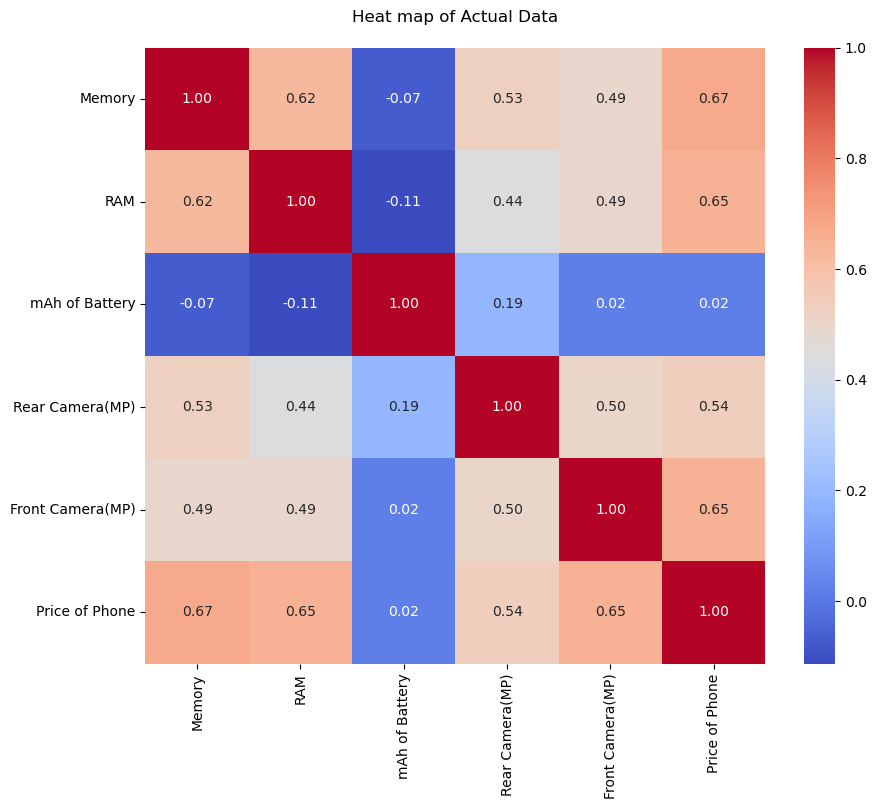

In [44]:
# Heat Map
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot= True,cmap='coolwarm',fmt=".2f")
plt.title('Heat map of Actual Data\n')
plt.show()

In [45]:
# Convert categorical variables in to numerical variables using one-hot encoding
categorical_cols = ['Model', 'Colour', 'Processor','Phone storage(RAM +ROM in GB)','Camera quality index (Front + Rear specs in MP)']
encoded_mobile_data = pd.get_dummies(mobile_data,columns=categorical_cols,drop_first=True,dtype=int)

In [46]:
encoded_mobile_data

,Memory,RAM,mAh of Battery,Rear Camera(MP),Front Camera(MP),Price of Phone,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,...,Camera quality index (Front + Rear specs in MP)_60+108,Camera quality index (Front + Rear specs in MP)_60+200,Camera quality index (Front + Rear specs in MP)_8+108,Camera quality index (Front + Rear specs in MP)_8+12,Camera quality index (Front + Rear specs in MP)_8+13,Camera quality index (Front + Rear specs in MP)_8+16,Camera quality index (Front + Rear specs in MP)_8+48,Camera quality index (Front + Rear specs in MP)_8+50,Camera quality index (Front + Rear specs in MP)_8+64,Camera quality index (Front + Rear specs in MP)_8+8
0,64,4,6000,13,5,7299.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64,4,6000,13,5,7299.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,8,5000,50,16,11999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,2,5000,8,5,5649.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,8,5000,50,5,8999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,50,12,34265.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,32,2,3100,5,2,5998.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,64,4,5000,50,8,9990.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
539,128,8,5000,50,32,34265.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# *Model Building* :

In [47]:
# Break data in Feature and target
x = encoded_mobile_data.drop('Price of Phone',axis = 1)
y = encoded_mobile_data['Price of Phone']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
# Head of x_train
x_train.head()

,Memory,RAM,mAh of Battery,Rear Camera(MP),Front Camera(MP),Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,...,Camera quality index (Front + Rear specs in MP)_60+108,Camera quality index (Front + Rear specs in MP)_60+200,Camera quality index (Front + Rear specs in MP)_8+108,Camera quality index (Front + Rear specs in MP)_8+12,Camera quality index (Front + Rear specs in MP)_8+13,Camera quality index (Front + Rear specs in MP)_8+16,Camera quality index (Front + Rear specs in MP)_8+48,Camera quality index (Front + Rear specs in MP)_8+50,Camera quality index (Front + Rear specs in MP)_8+64,Camera quality index (Front + Rear specs in MP)_8+8
414,64,3,5000,13,8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
537,32,2,3100,5,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,32,3,5000,13,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,256,8,5000,48,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,32,3,5000,8,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Scaling of features dataset as some features have higher values
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [51]:
x_train_scaled

array([[-0.78642375, -1.19539368,  0.17014795, ..., -0.46732302,
        -0.10923907, -0.04862166],
       [-1.31780809, -1.70173426, -2.21365734, ..., -0.46732302,
        -0.10923907, -0.04862166],
       [-1.31780809, -1.19539368,  0.17014795, ..., -0.46732302,
        -0.10923907, -0.04862166],
       ...,
       [-1.31780809, -1.19539368,  0.17014795, ..., -0.46732302,
        -0.10923907, -0.04862166],
       [ 0.27634492,  1.33630922,  0.17014795, ..., -0.46732302,
        -0.10923907, -0.04862166],
       [ 0.27634492,  0.32362806,  0.17014795, ..., -0.46732302,
        -0.10923907, -0.04862166]])

# *Machine learning Model with linear regression* :

In [52]:
# Make object of Model
lr_model = LinearRegression()

In [53]:
# Fit the training dataset in object of model
lr_model.fit(x_train_scaled,y_train)

LinearRegression()

In [54]:
# Predict the test Data with Model
y_prediction = lr_model.predict(x_test_scaled)

In [55]:
# Score of model
lr_model.score(x_test_scaled,y_test)


-3.227069154593623e+26

In [56]:
# Mean Absolute Error
mae1 = mean_absolute_error(y_test, y_prediction)
mae1

8.065065198461803e+16

In [57]:
# Root Mean Square Score
rmse1 = mean_squared_error(y_test, y_prediction, squared=False)
rmse1

1.3358372644452774e+17

In [58]:
# R2 score
r2 = r2_score(y_test, y_prediction)
r2

-3.227069154593623e+26

# *Machine learning Model with Random Forest* :

In [59]:
# Make object of model
rf_model = RandomForestRegressor()

In [60]:
# Fit the training dataset in object of model
rf_model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [61]:
# Predict the test Data with Model
y_pred = rf_model.predict(x_test_scaled)

In [62]:
# Score of model
rf_model.score(x_test_scaled,y_test)

0.7969524950134542

In [63]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

In [64]:
# Root Mean Square Score
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [65]:
mae

1685.4214806408545

In [66]:
rmse

3350.79799495404

In [67]:
# R2 score
r2_ = r2_score(y_test, y_pred)
r2_

0.7969524950134542

In [68]:
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean R2 score Error:", r2_)

Mean Absolute Error: 1685.4214806408545
Root Mean Squared Error: 3350.79799495404
Mean R2 score Error: 0.7969524950134542


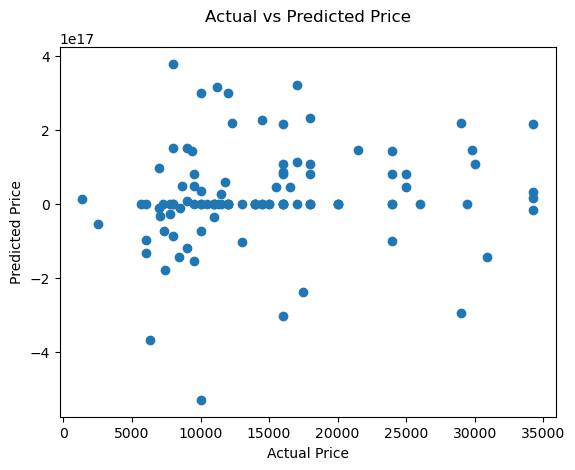

In [69]:
# Ploting of Test target and Predicted target with Random Forest Model
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price\n')
plt.show()

# *Feature Importance Analysis* :

In [70]:
# For linear regression, we can analyze the coefficients of the model
feature_importance = pd.DataFrame({'Feature': encoded_mobile_data.drop('Price of Phone',axis = 1).columns, 'Coefficient': lr_model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

                           Feature   Coefficient
95             Model_REDMI K50i 5G  7.437351e+16
200           Colour_Atlantic Blue  4.974719e+16
38   Model_MOTOROLA Edge 30 Fusion  4.398343e+16
199            Colour_Astral White  3.998753e+16
258               Colour_Eco Black  3.923630e+16
..                             ...           ...
239                   Colour_Cream -4.601784e+16
472       Processor_Dimensity 8100 -4.998195e+16
47              Model_MOTOROLA e40 -5.398423e+16
161   Model_realme Narzo 30 Pro 5G -5.674024e+16
176              Model_vivo T2x 5G -7.149864e+16

[645 rows x 2 columns]


# *Feature Importance analysis with Random Forest model* :

In [71]:
# get the feature importance
feature_importances = rf_model.feature_importances_
feature_importances

array([8.75568798e-02, 2.47127822e-02, 1.17872776e-01, 4.95994644e-02,
       5.01989147e-01, 0.00000000e+00, 0.00000000e+00, 7.54332713e-05,
       2.37396953e-02, 5.50974417e-05, 9.85484165e-07, 0.00000000e+00,
       1.21270117e-03, 5.17714322e-07, 1.25623903e-04, 5.55331878e-06,
       1.12905866e-04, 2.24157556e-05, 5.58629685e-05, 2.74721658e-06,
       4.56539849e-05, 3.85873026e-06, 5.74976057e-07, 1.14415719e-04,
       3.90333790e-06, 2.09815667e-04, 8.98819009e-05, 2.69535976e-05,
       2.84916905e-06, 3.03658485e-05, 1.30385790e-05, 6.36753096e-06,
       7.39373241e-04, 8.36833916e-06, 1.34095375e-03, 1.54275237e-09,
       1.09003030e-06, 5.89087383e-05, 3.02886748e-04, 3.00730034e-06,
       1.17666517e-04, 5.84941451e-04, 1.64067632e-05, 4.80658352e-05,
       5.29904012e-05, 3.44387239e-07, 4.94186224e-05, 2.72146011e-07,
       9.32924314e-05, 0.00000000e+00, 9.83333552e-05, 3.87896474e-05,
       1.80941879e-04, 1.15511674e-04, 2.36101630e-05, 2.22264613e-04,
      

In [72]:
# Create a dataframe to visualize the feature importances
feature_importances_df = pd.DataFrame({'Feature': encoded_mobile_data.drop('Price of Phone',axis = 1).columns, "Importance": feature_importances})
feature_importances_df

,Feature,Importance
0,Memory,8.755688e-02
1,RAM,2.471278e-02
2,mAh of Battery,1.178728e-01
3,Rear Camera(MP),4.959946e-02
4,Front Camera(MP),5.019891e-01
...,...,...
640,Camera quality index (Front + Rear specs in MP...,1.174918e-08
641,Camera quality index (Front + Rear specs in MP...,5.520323e-07
642,Camera quality index (Front + Rear specs in MP...,1.273395e-02
643,Camera quality index (Front + Rear specs in MP...,1.270366e-04


In [73]:
# Sort the data by importance in the descending order
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)
feature_importances_df

,Feature,Importance
4,Front Camera(MP),0.501989
2,mAh of Battery,0.117873
0,Memory,0.087557
3,Rear Camera(MP),0.049599
1,RAM,0.024713
...,...,...
538,Processor_Qualcomm Snapdragon 439,0.000000
402,Colour_Silk Blue,0.000000
251,Colour_DawnBlue,0.000000
404,Colour_Silver Wave,0.000000


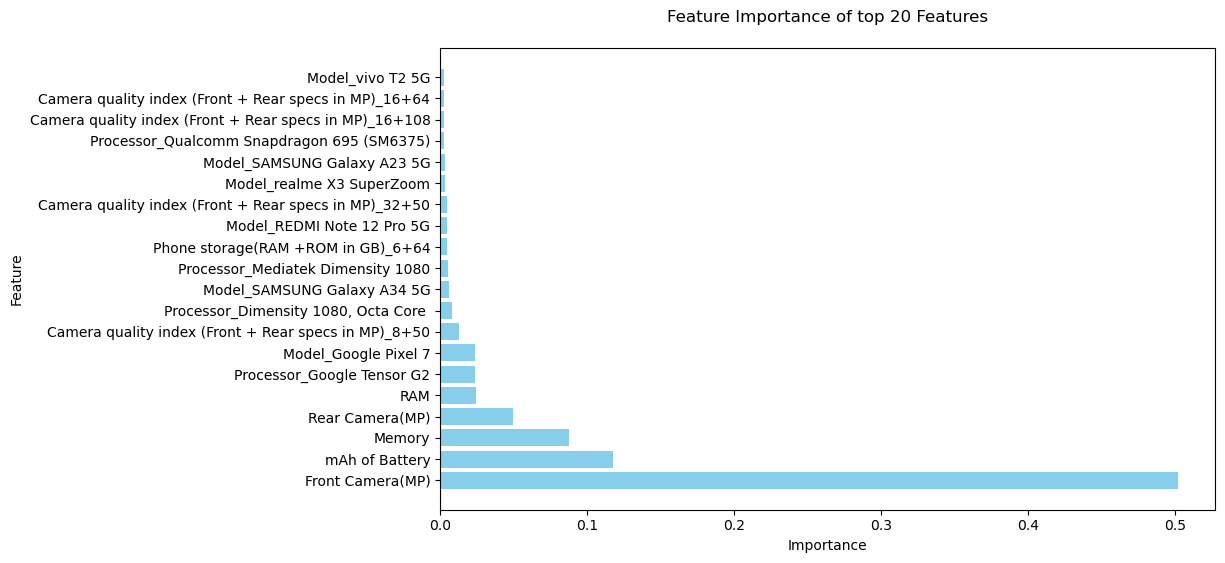

In [74]:
# Plot the feature importance(Top 20 features)
plt.figure(figsize=(10,6))
plt.barh(feature_importances_df['Feature'][0:20], feature_importances_df["Importance"][0:20], color='skyblue')
plt.xlabel('Importance')
plt.ylabel("Feature")
plt.title('Feature Importance of top 20 Features\n')
plt.show()

In [75]:
# Total columns for analysis
mobile_data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'mAh of Battery', 'Rear Camera(MP)',
       'Front Camera(MP)', 'Processor', 'Price of Phone',
       'Camera quality index (Front + Rear specs in MP)',
       'Phone storage(RAM +ROM in GB)'],
      dtype='object')

# *Report and Visualization* :

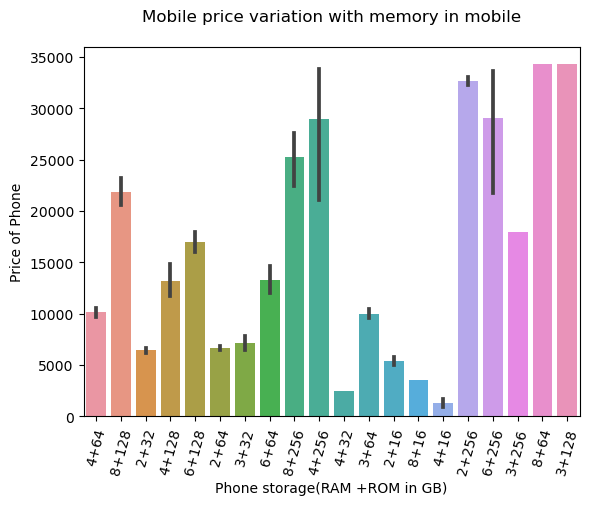

In [76]:
# Mobile price variation with memory in phone(Bar Plot)
sns.barplot(data = mobile_data,x="Phone storage(RAM +ROM in GB)",y = 'Price of Phone')
plt.xticks(rotation = 75)
plt.title('Mobile price variation with memory in mobile\n')
plt.show()

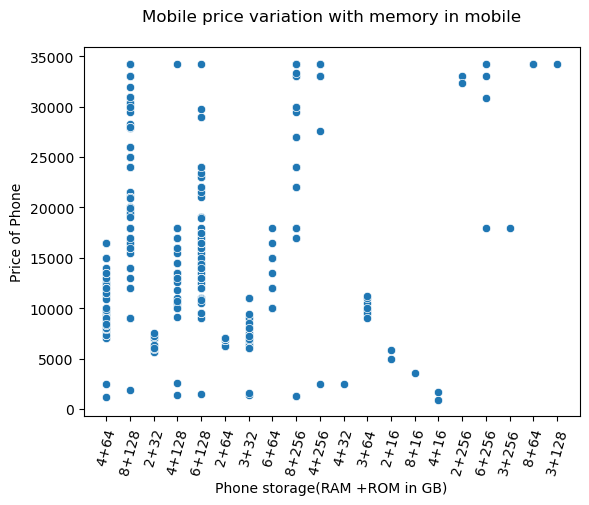

In [77]:
# Mobile price variation with memory in phone(Scatter Plot)
sns.scatterplot(data = mobile_data,x="Phone storage(RAM +ROM in GB)",y = 'Price of Phone')
plt.xticks(rotation = 75)
plt.title('Mobile price variation with memory in mobile\n')
plt.show()

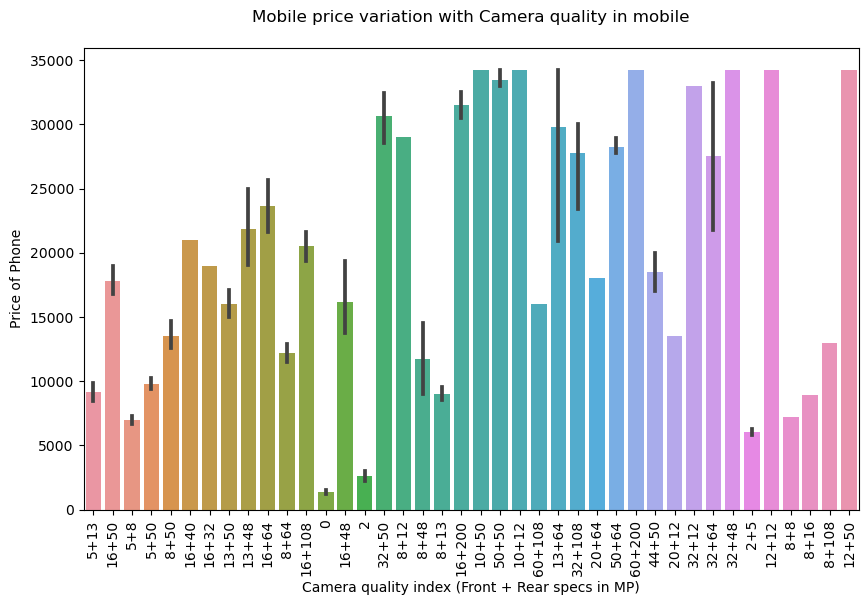

In [78]:
# Mobile price variation with camera quality index in phone(Bar Plot)
plt.figure(figsize=(10,6))
sns.barplot(data = mobile_data,x="Camera quality index (Front + Rear specs in MP)",y = 'Price of Phone')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Camera quality in mobile\n')
plt.show()

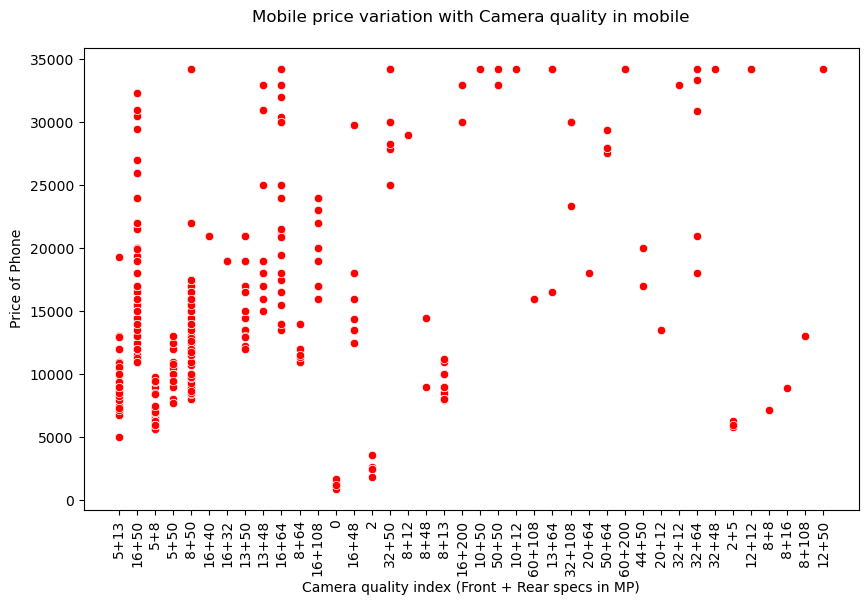

In [79]:
# Mobile price variation with camera quality index in phone(Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data = mobile_data,x="Camera quality index (Front + Rear specs in MP)",y = 'Price of Phone',color='red')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Camera quality in mobile\n')
plt.show()

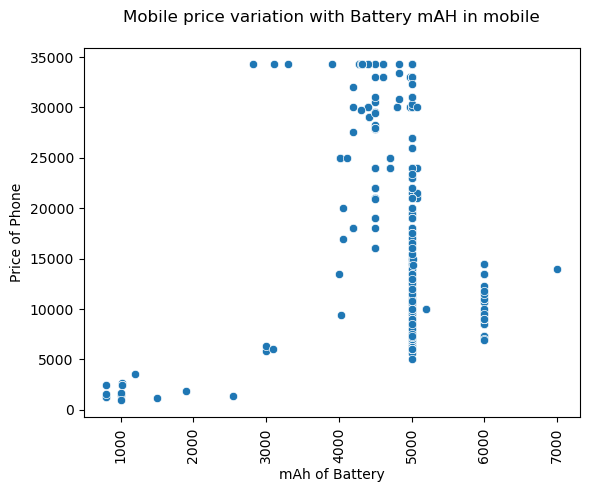

In [80]:
# Mobile price variation with Battery size
sns.scatterplot(data = mobile_data,x="mAh of Battery",y = 'Price of Phone')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Battery mAH in mobile\n')
plt.show()

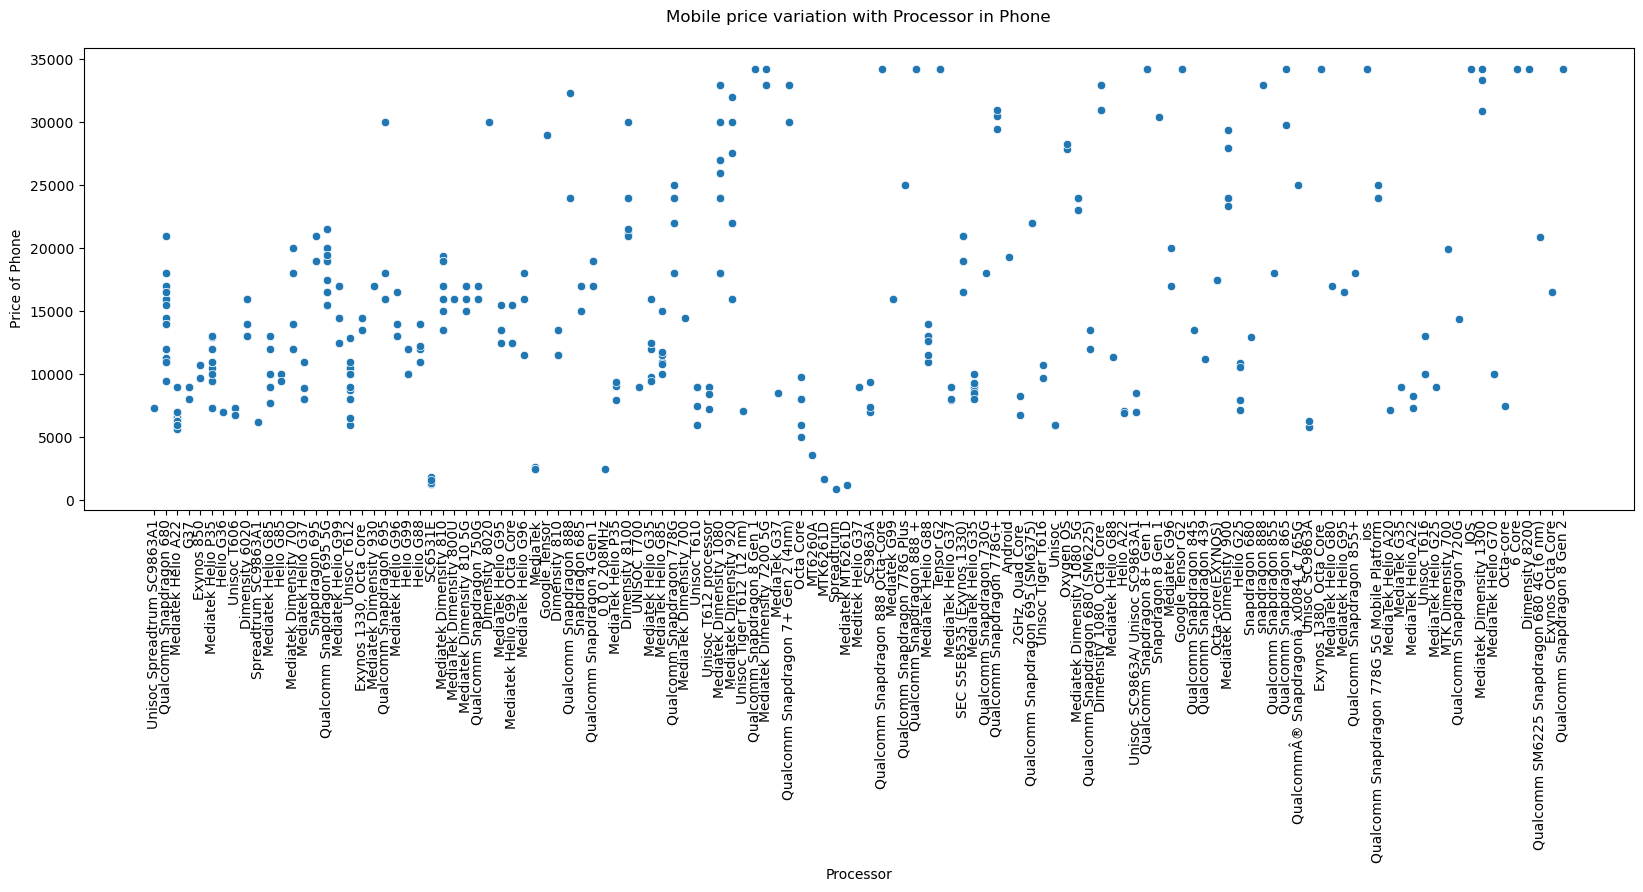

In [81]:
plt.figure(figsize=(20,6))
sns.scatterplot(data = mobile_data,y = 'Price of Phone',x="Processor")
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Processor in Phone\n')
plt.show()

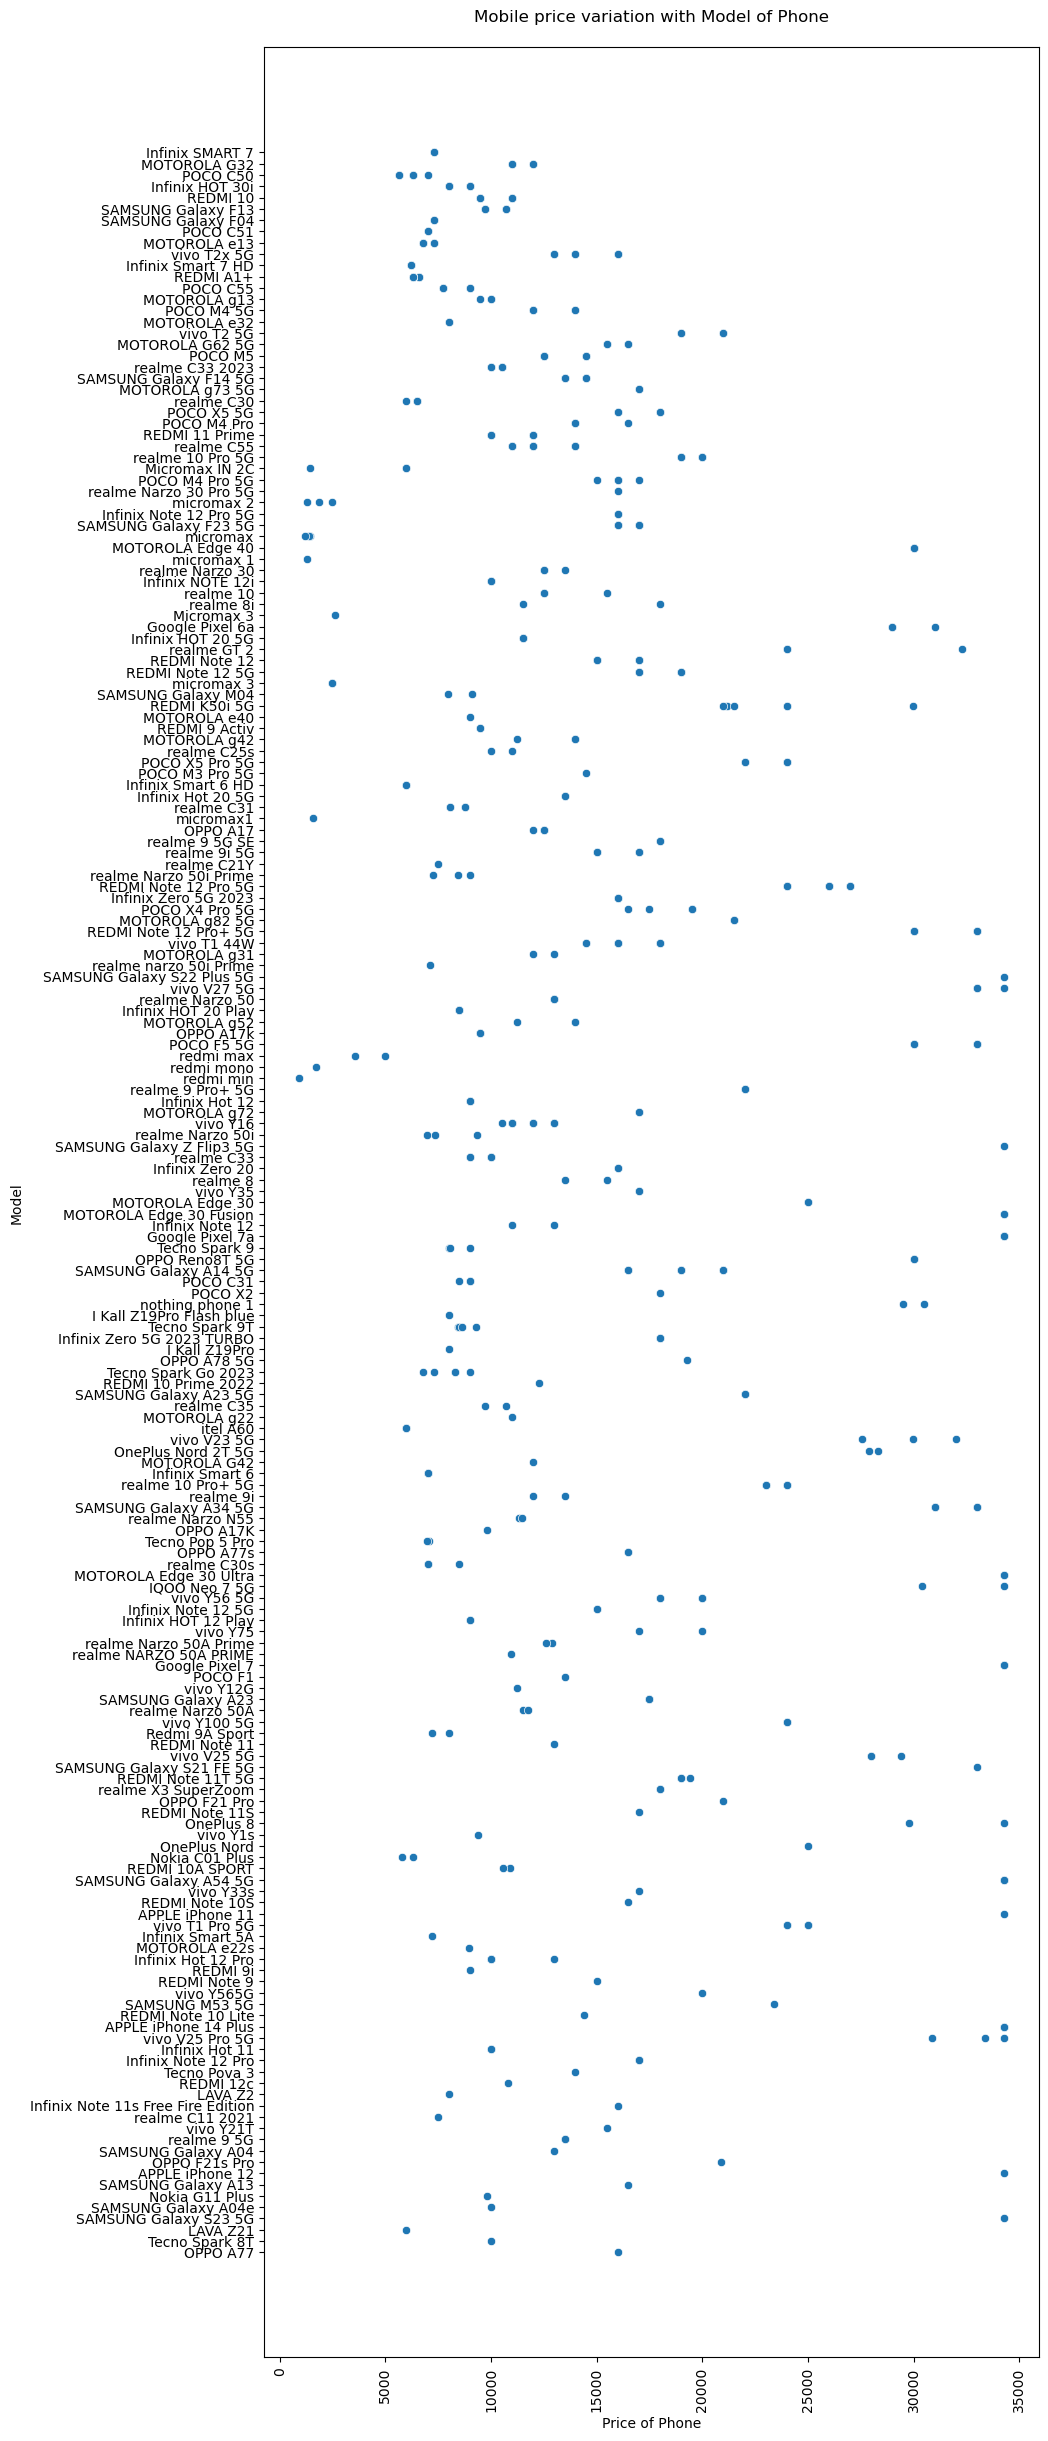

In [82]:
plt.figure(figsize=(10,30))
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y="Model")
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Model of Phone\n')
plt.show()

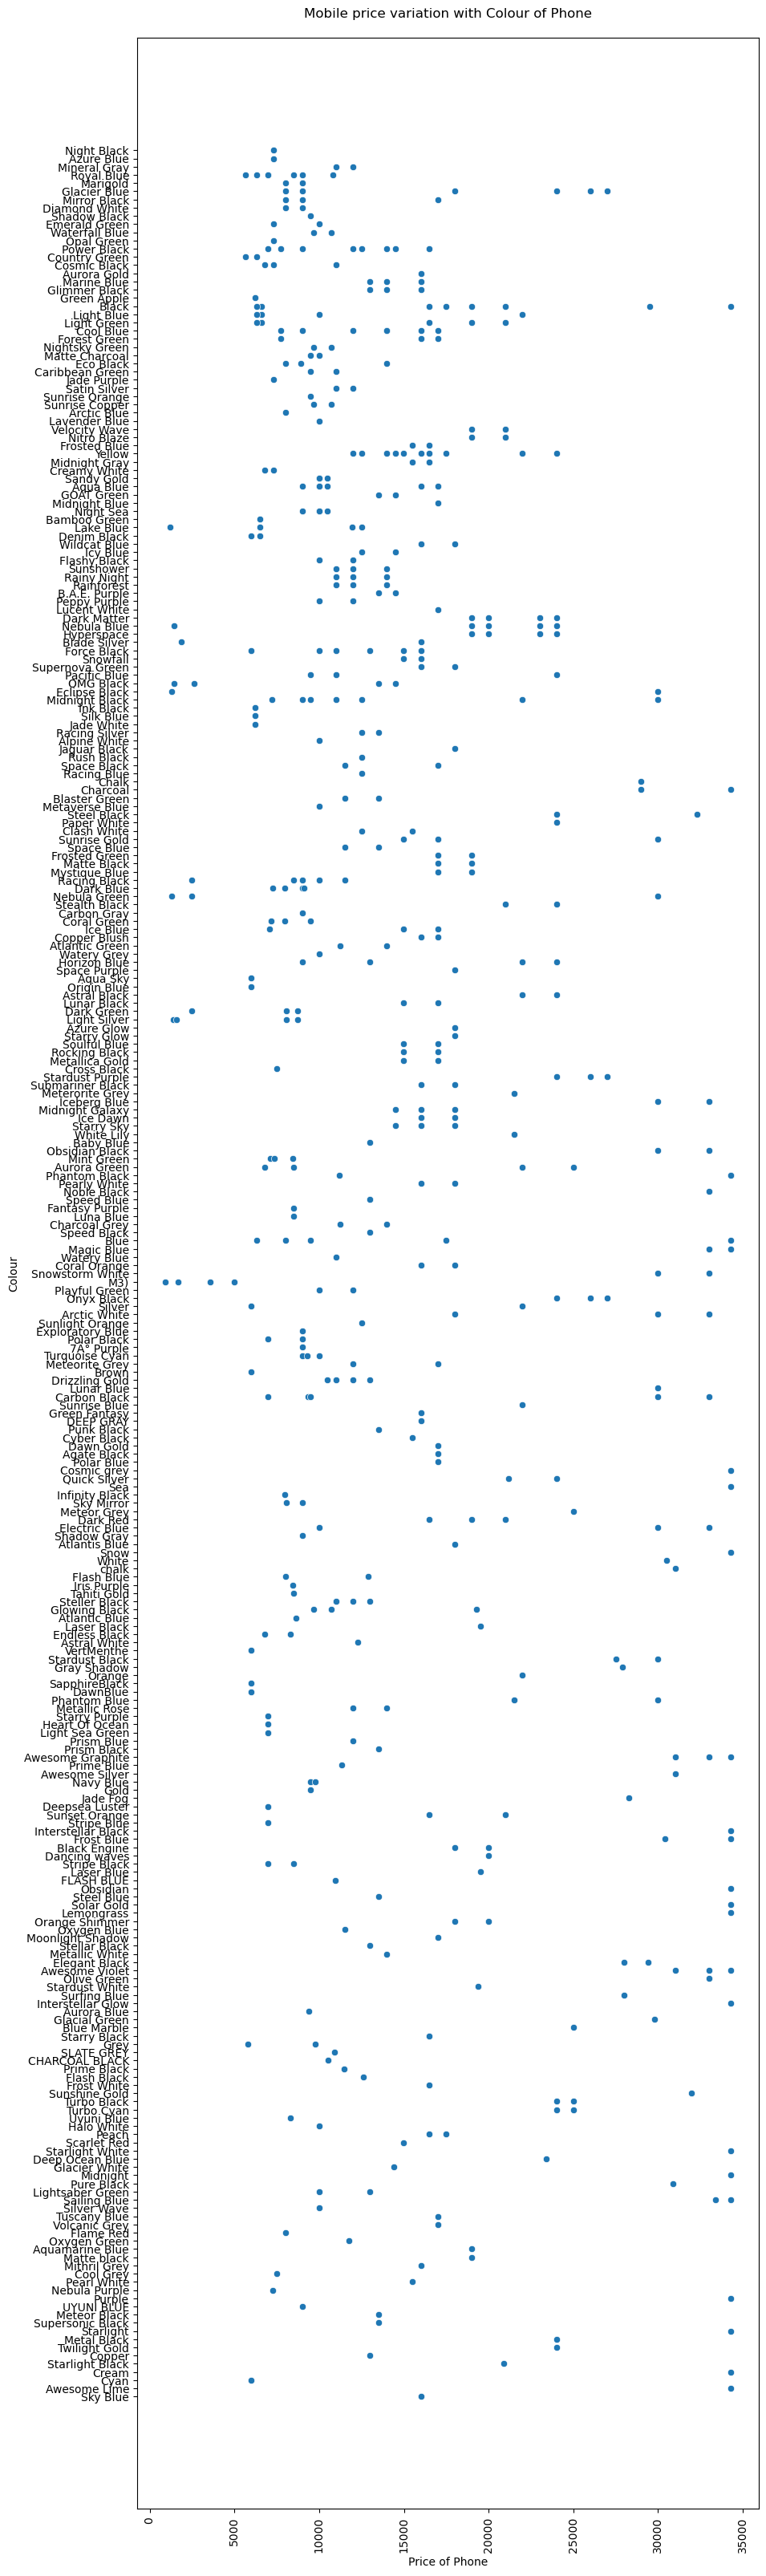

In [83]:
plt.figure(figsize=(10,40))
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y="Colour")
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Colour of Phone\n')
plt.show()